# Mood Detection CNN model
I will be using the Happy House dataset for this project, which contains images of peaoples' faces. I will build a ConvNet that determines whether the people in the image are smiling or not.

### Technologies used
1. Tensorflow
2. Sequential API

<h3>Table of content</h3>
<ol>
    <li><a href="#load_dataset">Load Dataset and split</a></li>
    <li><a href="#check_dimensions">Check dimensions of Data</a></li>
</ol>

In [3]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *

%matplotlib inline

<h3 id="load_dataset">Load the Data and split the Data into Train/Test sets</h3>

In [5]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

<h3 id="check_dimensions">Check the dimensions of Data</h3>

In [9]:
print("Number of training examples: %d" % X_train.shape[0])
print("Number of test examples: %d" % X_test.shape[0])
print("X_train shape: %s" % str(X_train.shape))
print("Y_train shape: %s" % str( Y_train.shape))
print("X_test shape: %s" % str(X_test.shape))
print("Y_test shape: %s" % str(Y_test.shape))

Number of training examples: 600
Number of test examples: 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


## Observation
1. Images are 64x64 pixels images.
2. They have 3 channels. (RGB format)

### Let's open up a sample image

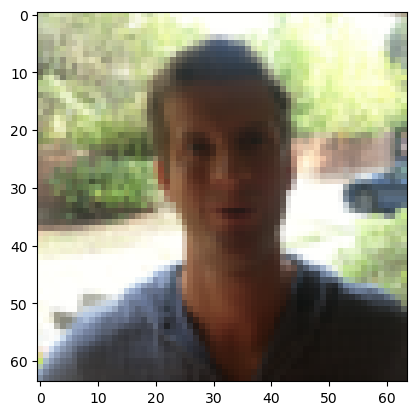

In [11]:
index = 120
plt.imshow(X_train_orig[index])
plt.show()